# Deep Learning - Convolutional Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10, mnist
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)

Using TensorFlow backend.


In [2]:
%%time
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step
CPU times: user 342 ms, sys: 97.3 ms, total: 439 ms
Wall time: 622 ms


In [3]:
s1 = x_train.shape
s2 = x_test.shape
print(f"The mnist data was loaded with {s1[0]} training samples and {s2[0]} testing samples. Each sample is a {s1[1]} x {s1[2]} pixel image.")


The mnist data was loaded with 60000 training samples and 10000 testing samples. Each sample is a 28 x 28 pixel image.


In [4]:
example = x_train[0]
example

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

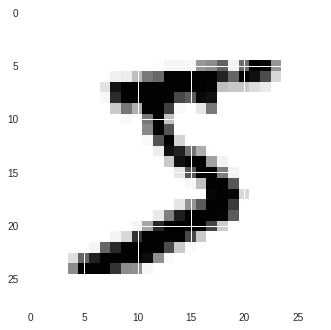

In [5]:
plt.imshow(example)

In [0]:
def calculate_conv_shape(X, K, padding=0, stride=1):
    """Calculate the shape of the output of a convolution 
    
    Args:
        X (np.array): The input matrix
        K (np.array): The filter matrix
        padding (int, optional): Defaults to 0. The padding dimension
        stride (int, optional): Defaults to 1. The stride of the convolution
    
    Returns:
        tuple: The shape of the convolution output
    """
    # YOUR CODE HERE
    return(int((X.shape[0] - K.shape[0] + 2*padding)/stride + 1), int((X.shape[1] - K.shape[1] + 2*padding)/stride + 1))

In [7]:

sharpen = np.array([
    [0, -1, 0],
    [-1, 8, -1],
    [0, -1, 0]
])
calculate_conv_shape(example, sharpen, padding=1)

(28, 28)

In [0]:
ans = calculate_conv_shape(example, sharpen, padding=1)
assert isinstance(ans, tuple)
assert isinstance(ans[0], int)
assert isinstance(ans[1], int)
assert ans == (28, 28)
ans = calculate_conv_shape(example, sharpen, padding=0, stride=2)
assert ans == (13, 13)

To apply a convolution, you can use the [convolve](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.convolve.html) function from scipy. (scipy has already been imported for you above.)

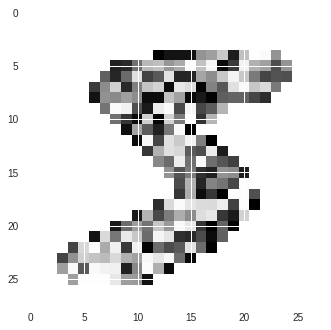

In [9]:
# Apply the sharpen filter to the example and save the output to sharpened_image
# YOUR CODE HERE
sharpened_image = scipy.ndimage.filters.convolve(example,sharpen)

plt.imshow(sharpened_image)
plt.show()

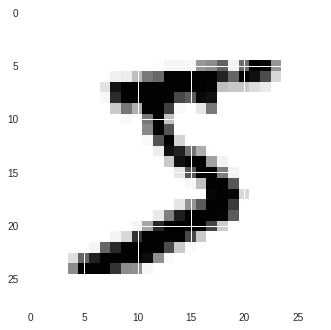

In [10]:

# Apply a filter of your choice (saved to my_filter) and save the output image to filtered_image
# YOUR CODE HERE

my_filter = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
filtered_image = scipy.ndimage.filters.convolve(example,my_filter)

plt.imshow(filtered_image)
plt.show()

In [0]:
assert sharpened_image.shape == example.shape
assert filtered_image.shape == example.shape
assert my_filter.shape == (3,3)

In [12]:
# Create a simple NN model with 2 hidden dense layers and an output layer
# You can choose any number of neurons per Dense layer ex. 100 or 200
# This is a classification task with 10 output classes so make sure you adjust the last output layer's hyperparameters accordingly
# Since the input data is a matrix, you will want to use the Flatten layer 
# Save the Sequential model to simple_model and its layers to simple_layers

# YOUR CODE HERE
simple_layers = [
    Flatten(input_shape=example.shape),
    Dense(100, activation='relu'), 
    Dropout(0.01),
    Dense(100, activation='relu'),
    Dropout(0.01),
    Dense(10, activation='softmax')
]

simple_model = Sequential(simple_layers)


simple_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
simple_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 9.1228 - acc: 0.4328
Epoch 2/5
60000/60000 [==============================] - 7s 116us/step - loss: 8.4924 - acc: 0.4727
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 8.3858 - acc: 0.4794
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 8.3388 - acc: 0.4824
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 8.4092 - acc: 0.4782


In [13]:
assert len(simple_layers) == 6
assert isinstance(simple_layers[0], Flatten)
assert isinstance(simple_layers[1], Dense)
assert isinstance(simple_layers[3], Dense)
assert isinstance(simple_layers[5], Dense)
assert isinstance(simple_layers[2], Dropout)
assert isinstance(simple_layers[4], Dropout)

simple_scores = simple_model.evaluate(x_test, y_test)
assert simple_scores[1] > 0.3

10000/10000 [==============================] - 0s 48us/step


In [14]:
print(f"\nThe simple model achieves an accuracy of {simple_scores[1]*100:.2f}% on the test data.")


The simple model achieves an accuracy of 48.31% on the test data.


In [36]:
# Create a CNN model with 4 convolutional layers, 2 dense fully connected hidden layers and the output layer
# Use Max pooling after every convolutional layer and use 32, 64, 128, 128 filters respectively
# You will need to flatten the output from the feature learning component 
# You can choose any number of neurons per Dense layer ex. 100 or 200
# Save the Sequential model to cnn_model and its layers to cnn_layers

# YOUR CODE HERE
#Conv2D, MaxPool2D

#X_train = x_train.reshape(x_train.shape[0], img_cols, img_rows, 1)
#X_test = x_test.reshape(x_test.shape[0], img_cols, img_rows, 1)


cnn_layers = [
    Conv2D(filters=32,kernel_size=(2, 2),input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=[1, 1], strides=2),
    Conv2D(filters=64,kernel_size=(2, 2)),
    MaxPool2D(pool_size=[1, 1], strides=2),
    Conv2D(filters=128,kernel_size=(2, 2)),
    MaxPool2D(pool_size=[1, 1], strides=2),
    Conv2D(filters=128,kernel_size=(2, 2)),
    MaxPool2D(pool_size=[1, 1], strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')#output
]

cnn_model = Sequential(cnn_layers)

#[
#    Flatten(input_shape=example.shape),
#    Dense(100, activation='relu'), 
#    Dropout(0.01),
#    Dense(100, activation='relu'),
#    Dropout(0.01),
#    Dense(10, activation='softmax')
#]

#conv2 = tf.layers.conv2d(
#    inputs=pool1,
#    filters=64,
#    kernel_size=[5, 5],
#    padding="same",
#    activation=tf.nn.relu)

#pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

cnn_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train.reshape(-1, 28, 28 ,1), y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 68s 1ms/step - loss: 0.8386 - acc: 0.7831


In [40]:
assert len(cnn_layers) == 12
assert isinstance(cnn_layers[0], Conv2D)
assert isinstance(cnn_layers[2], Conv2D)
assert isinstance(cnn_layers[4], Conv2D)
assert isinstance(cnn_layers[6], Conv2D)
assert isinstance(cnn_layers[1], MaxPool2D)
assert isinstance(cnn_layers[3], MaxPool2D)
assert isinstance(cnn_layers[5], MaxPool2D)
assert isinstance(cnn_layers[7], MaxPool2D)
assert isinstance(cnn_layers[8], Flatten)
assert isinstance(cnn_layers[9], Dense)
assert isinstance(cnn_layers[10], Dense)
assert isinstance(cnn_layers[11], Dense)

cnn_scores = cnn_model.evaluate(x_test.reshape(-1, 28, 28 ,1), y_test)
assert cnn_scores[1] > 0.8

10000/10000 [==============================] - 3s 326us/step


In [38]:
print(f"\nThe CNN model achieves an accuracy of {cnn_scores[1]*100:.2f}% on the test data.")


The CNN model achieves an accuracy of 85.19% on the test data.


The simple model predicts this number is a 3 and the CNN predicts it is a 3.


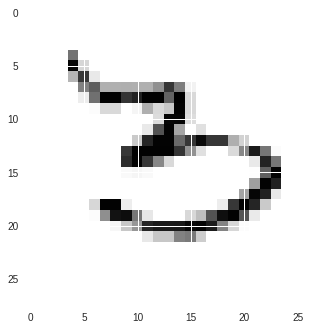

In [39]:
# Change this value to test out some numbers and see how the models score
i = 245

new_example = x_test[i]

simple_new_example = new_example.reshape(-1, 28, 28)
cnn_new_example=new_example.reshape(-1, 28, 28, 1)

simple_predict = simple_model.predict(simple_new_example).argmax()
cnn_predict = cnn_model.predict(cnn_new_example).argmax()

plt.imshow(new_example)
print(f"The simple model predicts this number is a {simple_predict} and the CNN predicts it is a {cnn_predict}.")

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()